# Introduction to Scikit-Learn (sklearn)

This notebook demostrates some of the most useful functions of the beautiful SciKit-Learn library.

What we are going to cover:

0. An end to end SciKit-Learn workflow.
1. Getting the data ready
2. Choose the right estimator/algo for our problems
3. Fit the model/algo and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Sciit-Learn workflow

In [1]:
# 1. Get the data ready

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create Y (labels)
y = heart_disease['target']

## 2. Choose the right model and hyperparameters

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)


# we'll keep the default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the training data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# make a prediction

#y_label = clf.predict(np.array([0,2,4,5]))

In [24]:
y_preds = clf.predict(X_test)

y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [25]:
y_test

278    0
50     1
1      1
57     1
188    0
      ..
144    1
174    0
213    0
216    0
20     1
Name: target, Length: 61, dtype: int64

In [26]:
#4. Evaluate the model on training data and test data

clf.score(X_train, y_train)

1.0

In [27]:
clf.score(X_test, y_test)

0.8032786885245902

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [30]:
print(confusion_matrix(y_test, y_preds))

[[21  9]
 [ 3 28]]


In [31]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [34]:
#5. Improve a model
# try different amount of n_estimators

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%
Trying model with 20 estimators...
Model accuracy on test set: 80.33%
Trying model with 30 estimators...
Model accuracy on test set: 73.77%
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
Trying model with 60 estimators...
Model accuracy on test set: 81.97%
Trying model with 70 estimators...
Model accuracy on test set: 78.69%
Trying model with 80 estimators...
Model accuracy on test set: 78.69%
Trying model with 90 estimators...
Model accuracy on test set: 83.61%


In [36]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [37]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

loaded_model.score(X_test, y_test)

0.8360655737704918

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data in to features and labes (Usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Conventional non-numerical values to numerical values (also called as feature encoding)

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [41]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [42]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, len(heart_disease)

((242, 13), (61, 13), (242,), (61,), 303)

## 1.1 Make sure it's all numerical

In [52]:
car_sales = pd.read_csv("data/car-sales-extended.csv")

car_sales.head(10)


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [53]:
len(car_sales)

1000

In [57]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [59]:
# split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [61]:
# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [62]:
# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
trasformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = trasformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [63]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [64]:
# another way to convert categorical data into numbers
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [65]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [49]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

car_sales_missing.head(20)

car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
# Create X and y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [68]:
# Let's try and convert our data to numbers

# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
trasformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = trasformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with Panadas

In [69]:


# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column.
car_sales_missing["Doors"].fillna(4, inplace=True)

In [70]:
# Check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [71]:
# Remove rows with missing Price value

car_sales_missing.dropna(inplace=True)

In [72]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [73]:
len(car_sales_missing)

950

In [74]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]  

In [76]:
# Let's try and convert our data to numbers
# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
trasformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)], 
                               remainder="passthrough")

transformed_X = trasformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with Scikit-Learn

In [77]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [78]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [80]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [81]:
# Split into X & y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [84]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numertical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the Data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [85]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [86]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [87]:
# Let's try and convert our data to numbers
# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
trasformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)], 
                               remainder="passthrough")

transformed_X = trasformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [89]:
# Now, we have got our data as numbers and filled (no missing values)
# let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [91]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

1. Sklearn refers to machine learning models, algorithms as estimators.
2. Classification problem - predicting a category (heart disease or not)
    - Sometimes you'll see `clf` (short for classifier) used as a classification estimator
3. Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use SKlearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![img](https://scikit-learn.org/stable/_static/ml_map.png)

### 2.1 Picking a machine learning model for a regressiion problem

Let's use the California Housing dataset

In [4]:
# Get California Housing dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_df = pd.DataFrame(housing['data'], columns=housing["feature_names"])

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
housing_df["MedHouseVal"] = housing["target"]

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
#Import algorithm/estimator
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median HousePrice in *100,000's

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)

model.score(X_test, y_test)

0.5758549611440126

What if `Ridge` didn't work on the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model **(an ensemble is combination of smaller models to try and make better predictions than just a single model)**?

In [9]:
#Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median HousePrice in *100,000's

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)

model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem


In [10]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try LinearSVC

In [26]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

e:\libs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

Tidbit:

    - If you have structured data (num dataframe etc.), use ensemble methods
    - If you have unstructured data (audio, images, etc.), use deep learning or transfer learning

In [30]:
#Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8064516129032258

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data  

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [33]:
#Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [37]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machines learning model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [42]:
# use a trained model to make predictions

clf.predict([1,3,4,5,5,6,7]) # this doesn't work

e:\libs\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 5. 5. 6. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [50]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [53]:
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [70]:
import numpy as np

arr1 = np.array([70,1,0,180,250,0,0,150,0,2.6,1,0,3])

pred1 = clf.predict(arr1.reshape(1, -1))

arr2 = np.array([59,1,3,170,288,0,0,159,0,0.2,1,0,3]);

pred2 = clf.predict(arr2.reshape(1, -1))

pred1, pred2

e:\libs\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
e:\libs\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(array([0], dtype=int64), array([1], dtype=int64))

Make predictions with `predict_proba()`

example output of probablity

here 2 columns represents the output label/target i.e. 0 or 1 (not heart disease or heart disease)

```
array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])
```

first row 0.89 represents 0
first row 0.11 represents 1

so, 89% chance that this person in our list does not have a heart disease where as 11% chance that he might have a heart disease. 

In [73]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

# in this case 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`predict()` can also be used for regression models.

In [34]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis=1)
y = housing_df['target']

#Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

model.score(X_test, y_test)

KeyError: "['target'] not found in axis"

In [81]:
y_preds = model.predict(X_test)

y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [82]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [84]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds) # output suggest that 32% of predictions are different from actual target values.

0.32659871732073664

In [85]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
 - Estimator's built-in `score()` method
 - The `scoring` parameter
 - Problem-specific metric functions

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [94]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [95]:
# the hightest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.8688524590163934, 1.0)

Let's use the `score()` our regression problem..

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis=1)
y = housing_df['target']

#Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
model.score(X_test, y_test), model.score(X_train, y_train)

(0.8065734772187598, 0.9736801960414609)

### 4.2 Evaluating a model using the `scoring` parameter

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [105]:
clf.score(X_test, y_test)

0.8688524590163934

In [107]:
# Model is trained on cv=5; 5 different vesions of training data, and evaluated on 5 different versions of the test data.
cross_val_score(clf, X, y, cv=5) # cv = cross validation


array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.76666667])

In [108]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [109]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two

clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215300546448088)

In [112]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [110]:
# Scoring parameter set to None by default

cross_val_score(clf, X,y,cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report 

![img](help-content/which-classification-metric-to-use.png)

#### 1. Accuracy

In [4]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [5]:
np.mean(cross_val_score)

0.8248087431693989

In [6]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 2. Area Under the Receiver Operating Characterisitic Curve (AUC/ROC)

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true postive rate (TPR) versus a models false positive rate (FPR).

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1



When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

*   ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
    
*   The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.
    
*   The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.
    

For more information on these metrics, bookmark the following resources and refer to them when you need:

*   [ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest
    
*   [ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)
    
*   [How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team

In [7]:
# Create X_test... etc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.metrics import roc_curve

# Fit the classifier

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [9]:
y_probs_postive = y_probs[:, 1]
y_probs_postive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [10]:
# Calculate FPR, TPR and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_postive)

fpr, tpr, thresholds

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
        0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
        0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
        1.        ]),
 array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
        0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
        0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
        0.9375 , 0.96875, 0.96875, 1.     , 1.     ]),
 array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
        0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
        0.28, 0.23, 0.2 , 0.  ]))

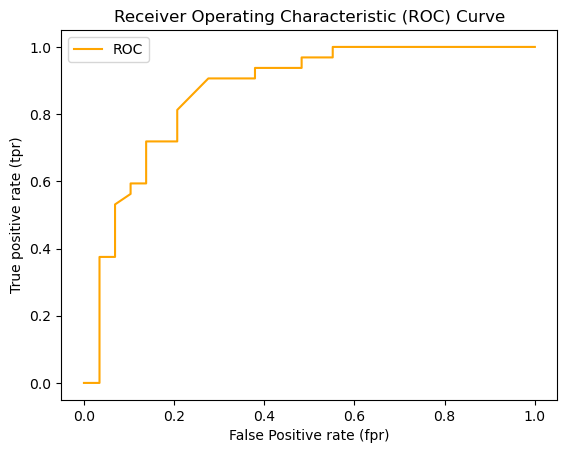

In [11]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    #plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
     
    pass

plot_roc_curve(fpr, tpr)

In [12]:
# Get AUC score, so in above graph we see the jagged curve, we need to take that area and that is what below value represent the area under the graph
# remember the max value of AUC is 1.0 and min is 0.0
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_postive)

0.8669181034482759

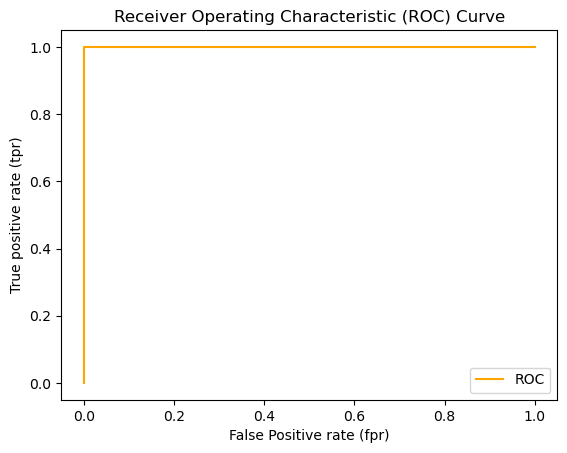

In [13]:
# Plot perfect ROC curve and perfect AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [14]:
# Get perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### 3. Confusion Matrix

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essense, giving you an idea of where the model is getting confused.

![img](help-content/confusion-matrix-anatomy.png)

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [16]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [17]:
22 + 7 + 5 + 27 

61

In [18]:
len(X_test)

61

In [40]:
# install a new package from conda in current env
import sys
!conda install --yes --prefix {sys.prefix} seaborn 

Solving environment: ...working... done

## Package Plan ##

  environment location: e:\libs\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.5.7           |  py310haa95532_0         153 KB
    ------------------------------------------------------------
                                           Total:         153 KB

The following packages will be UPDATED:

  certifi                         2022.12.7-py310haa95532_0 --> 2023.5.7-py310haa95532_0 




certifi-2023.5.7     | 153 KB    |            |   0% 
certifi-2023.5.7     | 153 KB    | #          |  10% 
certifi-2023.5.7     | 153 KB    | ########## | 100% 
certifi-2023.5.7     | 153 KB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: .



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




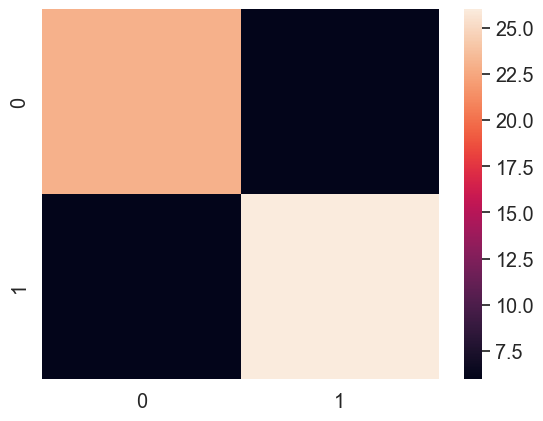

In [19]:
# Make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.3)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

In [20]:
import sklearn

sklearn.__version__

'1.2.1'

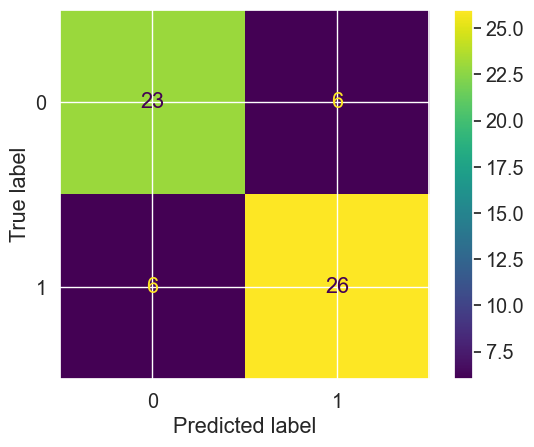

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test)

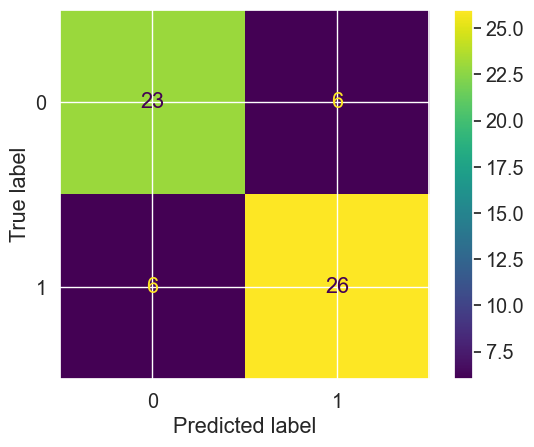

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### 4. Classification Report

![img](help-content/classification-report-anatomy.png)

In [27]:
from sklearn.metrics import classification_report

## here y_true means the true labels and y_pred means estimated labels. 
## That is why we do not need X here, since we want to check our labels (y-axis)

print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [30]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0


print(classification_report(disease_true, disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



e:\libs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\libs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\libs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover

1. R^2 (R-squared or coefficient of determination)
2. Mean Absolute error (MAE)
3. Mean squared error (MSE)

![img](help-content/which-regression-metric-to-use.png)

#### 1. R^2 (R-squared or coefficient of determination)

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.0 . For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0.0 And if your model perfectly predicts a range of numbers it's R^2 value would be 1.0

In [11]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
model.score(X_test, y_test)

0.8065734772187598

In [13]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
y_test.mean()

2.0550030959302323

In [15]:
from sklearn.metrics import r2_score

# fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [16]:
# this is worst score or it can also go to negative or infinity
r2_score(y_true=y_test, 
         y_pred=y_test_mean)

0.0

In [17]:
# this is perfect score or it can also go to negative or infinity
r2_score(y_true=y_test, 
         y_pred=y_test)

1.0

In [18]:
y_preds = model.predict(X_test)

r2_score(y_true=y_test, 
         y_pred=y_preds)

0.8065734772187598

#### 2. Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [19]:
# mean absolute error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test,
                    y_pred=y_preds)

0.32659871732073664

In [20]:
# difference between actual and predicted before mean absolute error value
df = pd.DataFrame(data={"actual values": y_test,
                         "predicted values": y_preds})

df['differences'] = df['predicted values'] - df["actual values"]

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [21]:
# MAE using formulas and differences
df['differences'].mean(), np.abs(df['differences']).mean()

(0.012048392126937589, 0.32659871732073664)

#### 3. Mean Squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [23]:
# mean squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=y_test,
                   y_pred=y_preds)

mse

0.2534678520824551

In [24]:
df["squared_differences"] = np.square(df['differences'])

df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [25]:
# Calculate MSE by hand

squared = np.square(df['differences'])

squared.mean()

0.2534678520824551

### 4.2.3 Finally using the `scoring` parameter

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [27]:
np.random.seed(42)

# Cross Validation accuracy 

# if scoring = None, estimator's default scoring evaluation metric is used (accurancy for classification models)
cv_acc = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring=None) # 5 sets of train test from full data sample,
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [31]:
# Cross-validated accurancy

print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [44]:
np.random.seed(42)

cv_acc = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="accuracy") # 5 sets of train test from full data sample,
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [45]:
# Cross-validated accuracy

print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [46]:
# Precision

np.random.seed(42)

cv_precision = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="precision") # 5 sets of train test from full data sample,
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [47]:
# Cross-validated precision

print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [48]:
# Recall 

np.random.seed(42)

cv_recall = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="recall") # 5 sets of train test from full data sample,
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [49]:
# Cross-validated Recall

print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


**Let's see the `scoring` parameter being used for a regression problem**

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)

In [52]:
np.random.seed(42)

cv_r2 = cross_val_score(estimator=model,
                        X=X,
                        y=y,
                        cv=3,
                        scoring=None)

cv_r2, cv_r2.mean()

(array([0.62156985, 0.72075819, 0.62130937]), 0.6545458023124507)

In [56]:
# Mean absolute error

cv_mae = cross_val_score(estimator=model,
                        X=X,
                        y=y,
                        cv=5,
                        scoring='neg_mean_absolute_error')

print(cv_mae, cv_mae.mean())

[-0.54243648 -0.40656038 -0.43800615 -0.46333592 -0.47411141] -0.4648900672529071


In [57]:
# Mean squared error

cv_mse = cross_val_score(estimator=model,
                        X=X,
                        y=y,
                        cv=5,
                        scoring='neg_mean_squared_error')

print(cv_mse, cv_mse.mean())

[-0.51869435 -0.34901694 -0.37285132 -0.4457963  -0.46645444] -0.43056266950079847


## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R-squared: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R-squared: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data prespective:
- could we collect more data? (generally, the more data, the better)
- could we improve our data?

From a model prespective:
- Is there a better model we could use?
- Could we improve the current model?

Parameters vs Hyperparameters
- Parameters = model find these patterns in data
- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Get Hyperparameters
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [67]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}